# CHARISMA: Demonstration of Chada wavenumber calibration

In [1]:
from ramanchada import chada,chada_utilities,chada_io


Create a CHADA archive from native Raman file

In [2]:
import os,os.path

#Set paths
import os, os.path, shutil

TEST_FILES = "test"
HOME=os.path.expanduser("~")

if os.name == 'nt':
     HOME = os.path.join(os.path.expanduser("~"),"Desktop")


In [11]:
#DATA_FILES = r"\\vm-stor-51\alle\Projekte Kunststoffe\RD\MA\Öffentliche_Projekte\2020-01-07_230007_H2020-CHARISMA_barton\Python\charisma-raman-spectrum-harmonization\test_data\\"
DATA_FILES = TEST_FILES
source_file = os.path.join(TEST_FILES,"200218-17.wdf")

assert os.path.exists(source_file),"{} does not exist!".format(source_file)

In [12]:
chada_file = os.path.join(TEST_FILES,"200218-17.cha")
chada_io.create(source_file, chada_file)
assert os.path.exists(chada_file),"{} does not exist!".format(chada_file)

## 1. Generate calibration using a reference spectrum with equal wavenumber range

Load CHADA archive into Chada object

In [13]:
C = chada.Chada(chada_file)

Show unprocessed data

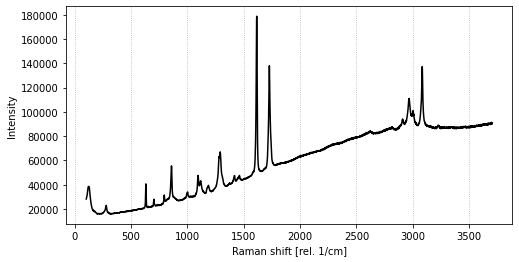

In [14]:
C.plot()

Now separate a baseline

In [15]:
#C.baseline()
C.fit_baseline()
C.remove_baseline()

The data has been updated

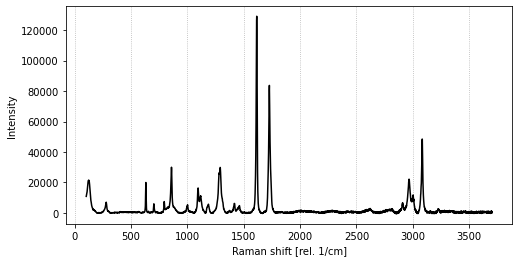

In [16]:
C.plot()

Crop spectrum k direction

In [17]:
C.x_crop(500, 2500)

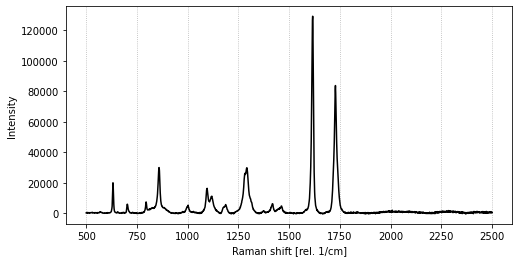

In [18]:
C.plot()

Area normalization

In [19]:
C.normalize('area')

commit saves the CHADA

In [20]:
C.commit('unshifted')

In [21]:
print(C.path,C.commits)

test\200218-17.cha ['Generated CHADA on Tue May 25 15:28:09 2021', 'unshifted']



Now, a copy of the unshifted CHADA is made and saved as "C:\Users\barton\Desktop\chada\200218-17_shifted.cha"

> NJ - is it supposed to be manual copy outside the notebook ?  Added a cell to do so


In [22]:
from shutil import copyfile

shifted_path = C.path.replace(".cha","_shifted.cha")
copyfile(C.path,shifted_path)
C.path = shifted_path

In [23]:
_shift=5
print("Shift spectrum in x direction by a constant {} rel. 1/cm".format(_shift))

Shift spectrum in x direction by a constant 5 rel. 1/cm


In [24]:
import numpy as np
C.shiftX(np.ones_like(C.x_data)*_shift)

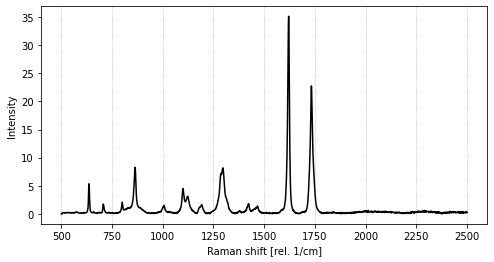

In [25]:
C.plot()

In [26]:
 
C.path
print("commit saves the shifted CHADA to {}".format(C.path))

commit saves the shifted CHADA to test\200218-17_shifted.cha


In [27]:
C.commit('shifted')


In [28]:
print(C.path,C.commits)

test\200218-17_shifted.cha ['Generated CHADA on Tue May 25 15:28:09 2021', 'unshifted', 'shifted']


A CHADA Group can be used to show the relative shift

In [29]:

G = chada.ChadaGroup([chada_file,shifted_path])

In [30]:
%matplotlib notebook

<IPython.core.display.Javascript object>


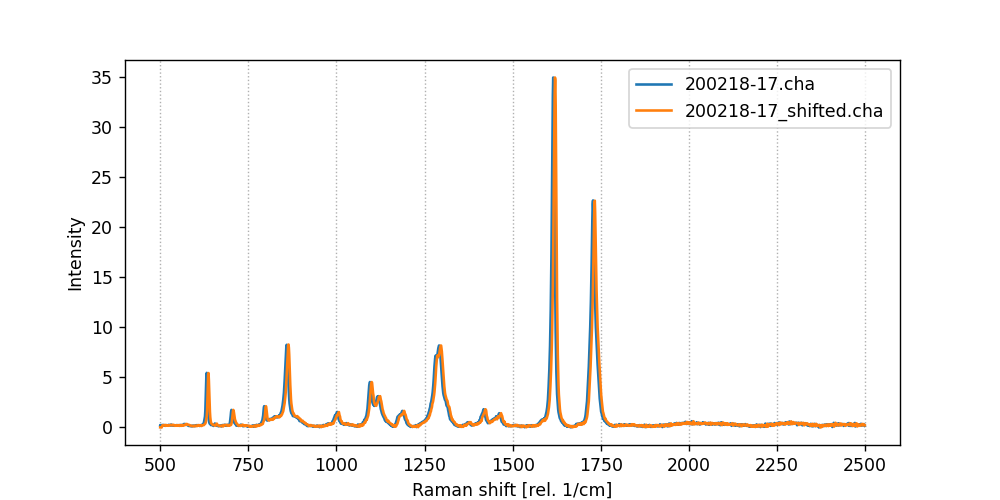

In [31]:
G.plot()

In [32]:
from ramanchada import chada_calibration

The shifts between both CHADA files is calculated

In [33]:
peak_pos, shift_pos = chada_calibration.makeXCalFromSpec(shifted_path, chada_file, bounds=[-10.,10.])

Saved calibration file 'test\200218-17_shifted.chacal'


TypeError: cannot unpack non-iterable NoneType object

~5 rel. 1/cm is the correct result !

In [34]:
assert shift_pos == _shift

NameError: name 'shift_pos' is not defined

The function makeXCalFromSpec() correctly finds the top-hat shift function that was applied

The CHADA method .XCal() calibrates the current CHADA using the determined shift anchors (orange circles).

In [35]:
C.XCal(peak_pos, shift_pos, show=True)

NameError: name 'peak_pos' is not defined

## 2. Generate calibration using a reference spectrum with different wavenumber range

The CHADA is reset to the raw state

In [36]:
C.rewind(0)

<IPython.core.display.Javascript object>


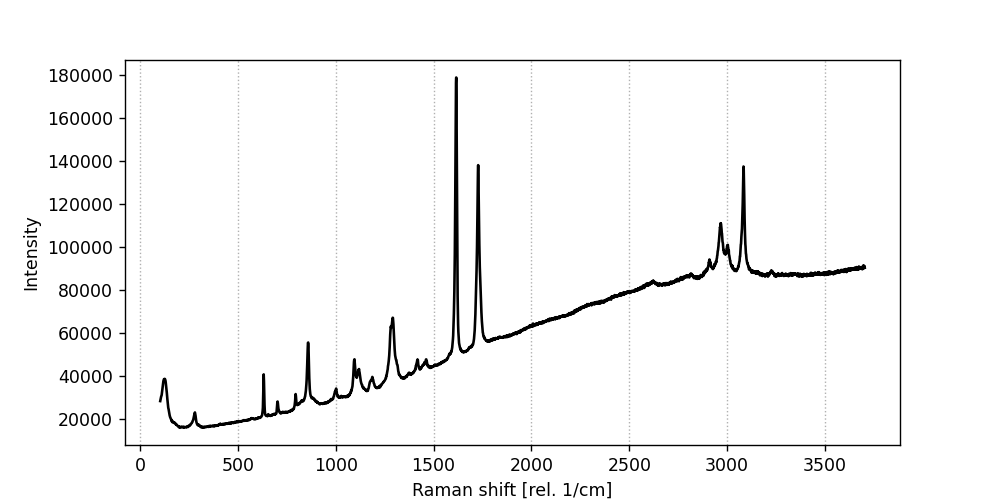

In [37]:
C.plot()

In [38]:
print(C.baseline)
#C.baseline()
# C.baseline is an array, not a function and returns error 'numpy.ndarray' object is not callable
C.fit_baseline()
C.remove_baseline()
C.normalize()

[17507.10143841 17487.80445595 17468.50757762 ... 90149.50215952
 90163.49558201 90177.48893648]


<IPython.core.display.Javascript object>


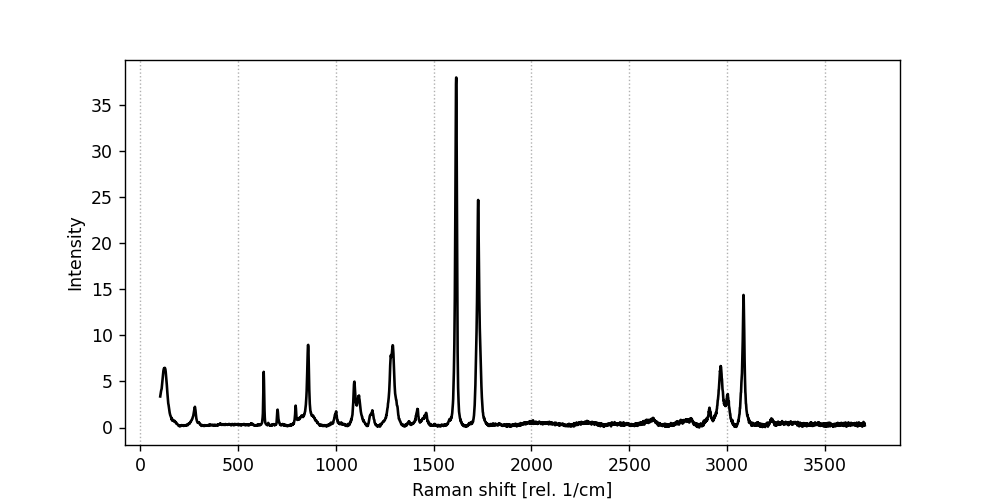

In [39]:
C.plot()

A baseline-corrected and normalized version is stored, this time with full wavenumber range.

In [40]:
C.commit('rewind')

In [41]:
from shutil import copyfile

target_path = chada_file.replace(".cha","_target.cha")
copyfile(C.path,target_path)

print(target_path)

test\200218-17_target.cha


In [42]:
print("Now, a copy of the unshifted CHADA is made as '{}', and loaded from disk into CHADA Cs".format(target_path))

Now, a copy of the unshifted CHADA is made as 'test\200218-17_target.cha', and loaded from disk into CHADA Cs


In [43]:
Cs = chada.Chada(target_path)

<IPython.core.display.Javascript object>


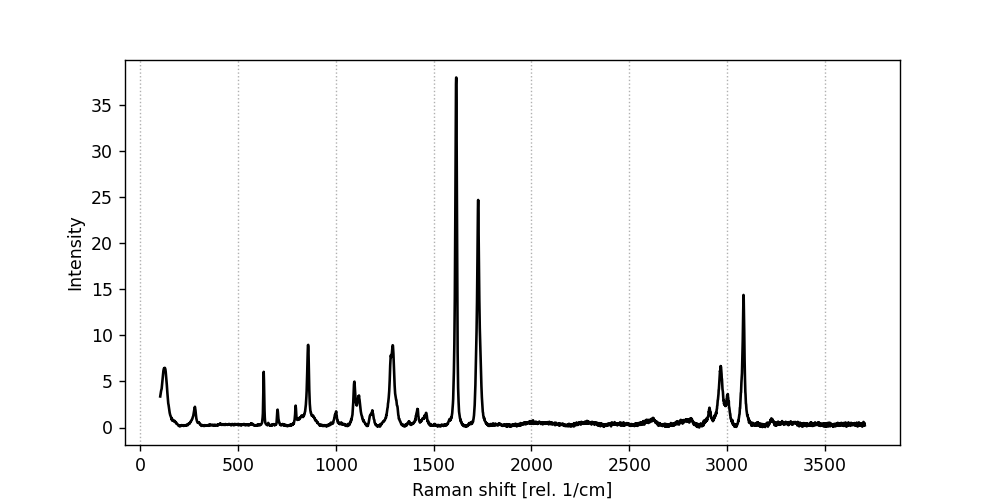

In [44]:
Cs.plot()

The target data is cropped

In [45]:
Cs.x_crop(500, 1500)

<IPython.core.display.Javascript object>


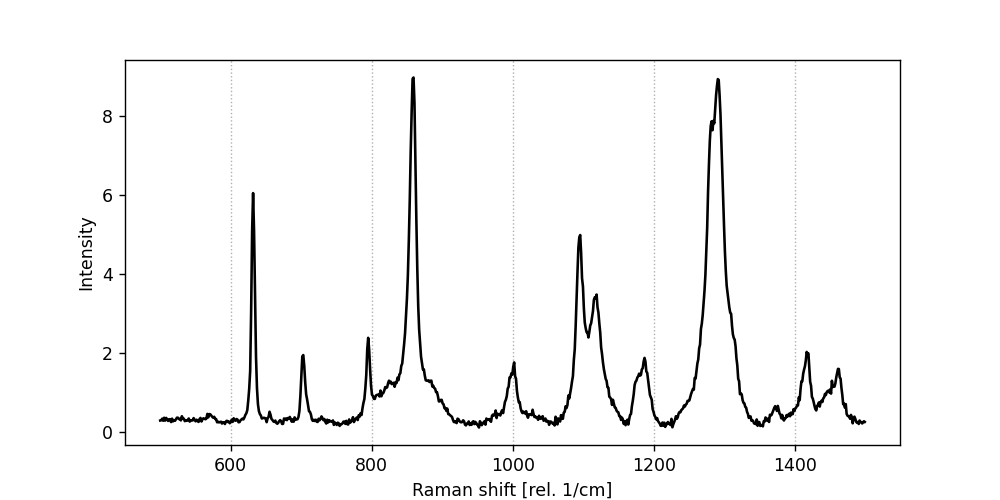

In [46]:
Cs.plot()

In [47]:
Cs.shiftX(np.ones_like(Cs.x_data)*5)

commit saves the cropped CHADA.

In [48]:
Cs.commit('shifted')

The shifts between both CHADA files is calculated

In [49]:
peak_pos, shift_pos = chada_calibration.makeXCalFromSpec(target_path, chada_file, bounds=[-10.,10.])

Saved calibration file 'test\200218-17_target.chacal'


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
shift_pos

The function makeXCalFromSpec() correctly finds the top-hat shift function that was applied

The CHADA method .XCal() calibrates the current CHADA using the determined shift anchors (orange circles).

In [50]:
Cs.XCal(peak_pos, shift_pos, show=True)

NameError: name 'peak_pos' is not defined

## 3. Generate calibration with non-constant wavenumber shift using a reference spectrum with different wavenumber range

This time, a ramp-shaped shift is applied from 0 to 5 rel. 1/cm

In [51]:
Cs.shiftX(np.linspace(0, 5, len(Cs.x_data)))

In [52]:
Cs.commit('shifted')

<IPython.core.display.Javascript object>


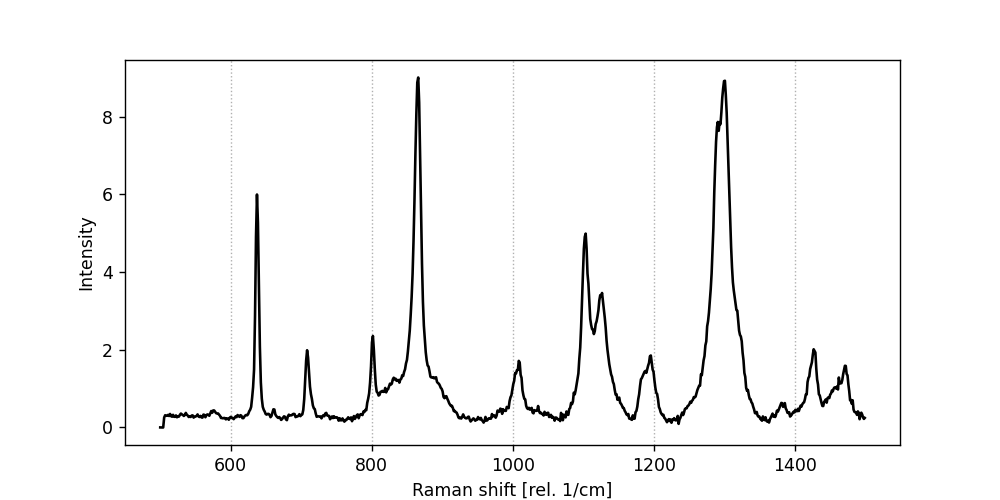

In [53]:
Cs.plot()

The shifts between both CHADA files is calculated. Remember, "C:\Users\barton\Desktop\chada\200218-17.cha" already has a constant shift of 5 rel. 1/cm! 

In [56]:
peak_pos, shift_pos = chada_calibration.makeXCalFromSpec(target_file, chada_file, bounds=[-10.,10.])

NameError: name 'target_file' is not defined

In [55]:
shift_pos

NameError: name 'shift_pos' is not defined

The relative shift function, a top hat plus ramp, is correctly determined and compensated by the .XCal() method.

In [ ]:
Cs.XCal(peak_pos, shift_pos, show=True)

In [ ]:
Cs.commit('calibrated with ramp shift')